""" Convolutional network applied to CIFAR-10 dataset classification task.
References:
    Learning Multiple Layers of Features from Tiny Images, A. Krizhevsky, 2009.
Links:
    [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)
"""

In [1]:
from __future__ import division, print_function, absolute_import

import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

# Data loading and preprocessing
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data('C:\\Users\\Flavio\\Desktop\\machine-learning\\')
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)


In [2]:
# Real-time data preprocessing
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Real-time data augmentation
img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)

# Convolutional network building
network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)
network = conv_2d(network, 32, 3, activation='relu')
network = max_pool_2d(network, 2)
network = conv_2d(network, 64, 3, activation='relu')
network = conv_2d(network, 64, 3, activation='relu')
network = max_pool_2d(network, 2)
network = fully_connected(network, 512, activation='relu')
network = dropout(network, 0.5)
network = fully_connected(network, 10, activation='softmax')
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

In [3]:
# Train using classifier
model = tflearn.DNN(network, tensorboard_verbose=0)
model.fit(X, Y, n_epoch=50, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=96, run_id='cifar10_cnn')

Training Step: 26049  | total loss: 0.38789 | time: 19.171s
| Adam | epoch: 050 | loss: 0.38789 - acc: 0.8586 -- iter: 49920/50000
Training Step: 26050  | total loss: 0.38679 | time: 20.661s
| Adam | epoch: 050 | loss: 0.38679 - acc: 0.8592 | val_loss: 0.68277 - val_acc: 0.8130 -- iter: 50000/50000
--


In [4]:
model.save('cifar10.tflearn')

INFO:tensorflow:C:\Users\Flavio\Desktop\machine-learning\cifar10.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [ ]:
model.load('cifar10.tflearn')

In [6]:
import numpy as np


classes = np.array([    
'airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck'])

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import requests
from io import BytesIO

Set the image URL here

In [8]:
url='http://media.caranddriver.com/images/media/51/25-cars-worth-waiting-for-lp-ferrari-488gtb-photo-658256-s-original.jpg'

airplane 0.0
automobile 1.0
bird 0.0
cat 0.0
deer 0.0
dog 0.0
frog 0.0
horse 0.0
ship 0.0
truck 0.0


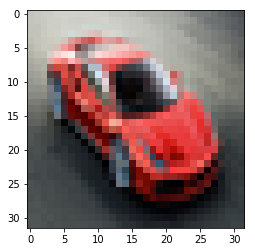

In [10]:
%matplotlib inline

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.resize((32, 32), Image.ANTIALIAS)
imgplot = plt.imshow(img)
arr = np.array(img)
predictions = model.predict(arr.astype('float64').reshape(1, 32,32,3))
for i in range(0,10):
    print(classes[i],predictions[0][i])